In [61]:
import datetime
import json
import os
import sys
import time

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [41]:
slices = [f"data/Songs/{f}" for f in os.listdir('data/Songs') if f.endswith(".csv")]

# Inspect the Million Playlist Dataset "slice"

In [42]:
df_mpd0 = pd.read_csv(slices[0])
df_mpd0.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [5]:
percent_gt_1 = len(df_mpd.loc[df_mpd.num_followers>1])/len(df_mpd)
print(f"Percent of playlists with more than 1 follower: {percent_gt_1*100}%")

Percent of playlists with more than 1 follower: 24.7%


In [43]:
playlists = [group for _, group in df_mpd0.groupby("pid")]
len(playlists)

1000

# Look at Most Common Songs, Albums and Artists

**Global dicionaries**

In [69]:
# Look up tables for URIs
ArtistNames = {}
SongNames = {}
AlbumNames = {}

# Counts for top values
SongCounts = {}
ArtistCounts = {}
AlbumCounts = {}

**Iterate to get counts**

In [70]:
start_time = time.time()
total_slices = 1000
for i, slc in enumerate(slices[:total_slices + 1]): 
    slice_df = pd.read_csv(slc)
    for playlist_df in [group for _, group in slice_df.groupby("pid")]:
        for _, track in playlist_df.iterrows():
            # update counts
            SongCounts[track['track_uri']] = SongCounts.get(track['track_uri'], 0) + 1
            ArtistCounts[track['artist_uri']] = ArtistCounts.get(track['artist_uri'], 0) + 1
            AlbumCounts[track['album_uri']] = AlbumCounts.get(track['album_uri'], 0) + 1

            # update uris to name pairs
            SongNames[track['track_uri']] = track['track_name']
            ArtistNames[track['artist_uri']] = track['artist_name']
            AlbumNames[track['album_uri']] = track['album_name']
            
    with open('data/song_counts.json', 'w') as outfile:
        json.dump(SongCounts, outfile)
        
    current_time = time.time()
    elapsed_time = current_time - start_time
    time_left = total_slices * elapsed_time / float(i+1) - elapsed_time
    sys.stdout.write(
        f"\rParsed slice {i+1}/{total_slices}. Time remaining: {str(datetime.timedelta(seconds=time_left))[:-7]}")
    sys.stdout.flush()

Parsed slice 1000/1000. Time remaining: :00:13

**Plot count distributions**

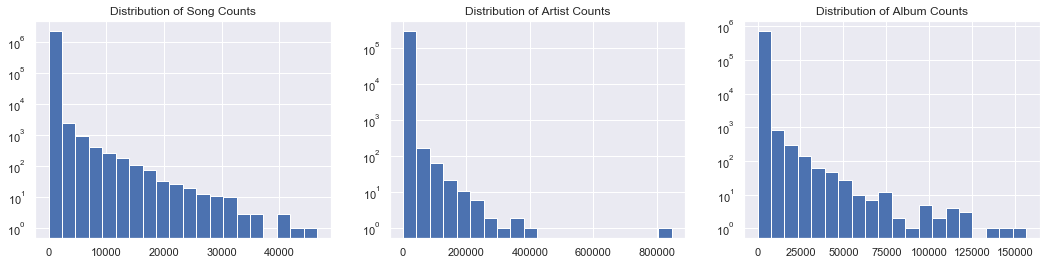

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].hist(SongCounts.values(), bins=20, log=True)
axs[1].hist(ArtistCounts.values(), bins=20, log=True)
axs[2].hist(AlbumCounts.values(), bins=20, log=True)

axs[0].set_title("Distribution of Song Counts")
axs[1].set_title("Distribution of Artist Counts")
axs[2].set_title("Distribution of Album Counts")

plt.show()

**Percent of songs appearing on more than a given number of playlists**

In [72]:
song_count_series = pd.Series(list(SongCounts.values()), index=list(SongCounts.keys()))

print(f"Total number of songs seen in the MPD: {len(song_count_series)}")

Total number of songs seen in the MPD: 2262292


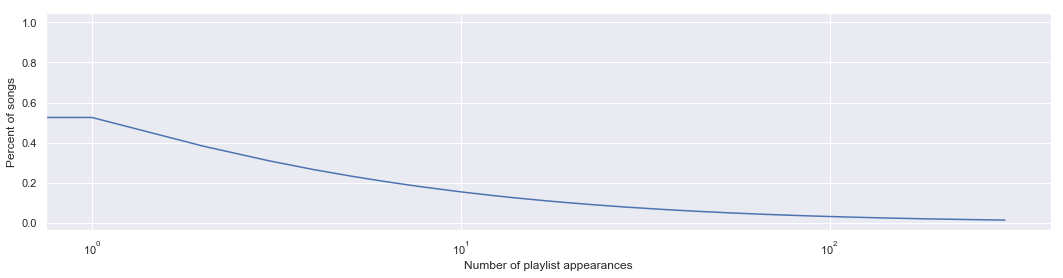

In [74]:
xs = range(0, 300)
ys = [len(song_count_series.loc[song_count_series>x])/len(song_count_series) for x in xs]

fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(xs, ys)
ax.set_xlabel("Number of playlist appearances")
ax.set_ylabel("Percent of songs")
ax.set_xscale("log")
plt.show()

In [34]:
list(zip(xs, ys))

[(0, 1.0),
 (1, 0.6225973581991902),
 (2, 0.5730621194527783),
 (3, 0.3017558957190095),
 (4, 0.23390723636513672),
 (5, 0.20745975703920264),
 (6, 0.17028475099760104),
 (7, 0.14676081741395874),
 (8, 0.13243190672946004),
 (9, 0.11887514219867144),
 (10, 0.10804741331038507),
 (11, 0.09963632505584798),
 (12, 0.09234514343646298),
 (13, 0.08556086692562051),
 (14, 0.07976682365007044),
 (15, 0.07472134954643782),
 (16, 0.07054232952368603),
 (17, 0.06670517573692804),
 (18, 0.0630094838409261),
 (19, 0.06011540932587515),
 (20, 0.05717418084723884),
 (21, 0.05461607832273351),
 (22, 0.05239984203422199),
 (23, 0.05047831801811891),
 (24, 0.04869236164732372),
 (25, 0.04688282829473585),
 (26, 0.045208862587455864),
 (27, 0.04367046452548377),
 (28, 0.04204365278178914),
 (29, 0.04069387057415845),
 (30, 0.039408925066457615),
 (31, 0.03814755654054946),
 (32, 0.037027649905397364),
 (33, 0.036007945442864134),
 (34, 0.03502950069846809),
 (35, 0.03395674802690134),
 (36, 0.0329841975

In [24]:
top_songs = song_count_series.loc[song_count_series > 2].index

In [25]:
np.save('data/top_songs', np.array(top_songs))

In [26]:
with open('data/song_counts.json', 'w') as outfile:
    json.dump(SongCounts, outfile)